**Fadhlurohman Al Farabi**

**Absen 12**

**TI-3E**

Jobsheet 1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Praktikum 1**

Langkah 1 - Load Data

Import library yang dibutuhkan kemudian, load data ke dalam DataFrame Pandas.

In [3]:
import pandas as pd

data = '/content/drive/MyDrive/KULIAH/SEMESTER 5/MACHINE LEARNING/JOBSHEET 1/DATASET/Titanic-Dataset.csv' # path dataset
df = pd.read_csv(data) # load dataset

program diatas digunakan untuk mengimport library pandas dan library tersebut akan dipanggil sebagai pd.

selain itu program diatas juga melakukan load atau mengakses dataset berdasarkan path dari file nya.

setelah itu, file tersebut dibaca dengan menggunakan library pandas yang telah diimportkan.

jika menggunakan colab, kita harus upload datanya dulu ke colab, baru kemudian bisa diakses

In [4]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


pada program diatas kita melakukan upload file dengan menggunakan function files.upload()

In [5]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv'])) # load dataset

pada program diatsa membaca file yang diupload dengan cara mengakses menggunakan function io.bytesio(uploaded) lalu disambung dengan mengakses nama file nya

tampilkan data teratas dengan perintah df.head()

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


dengan function head() kita akan menampilkan data teratas dari file yang telah diupload. file tersebut disimpan pada variabel df. sehingga yang digunakan adalah df.head()

Langkah 2 - Pengecekan Data

Lakukan pengecekan informasi mengenai data dengan menggunakan df.info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


dari df.info() kita dapat mengetahui jumlah data untuk setiap kolom. Selain itu, kita mengetahui bahwa,


*   "Age" berjenis float64
*   "Cabin" berjenis object



Pada Pandas, object sering kali mewaliki tipe data string. Kita harus cermat dalam hal ini. Hal ini berkaitan dengan teknik imputasi yang akan kita gunakan nantinya.

Selanjutnya, untuk lebih mengetahui jumlah data yang hilang untuk setiap kolom, gunakan perintah,

In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Dari informasi ini, kita dapat mengetahui data yang hilang sejumlah,



*   177 data "Age"
*   687 data "Cabin"
*   2 data "Embarked"


Langkah 3 - Imputasi

Pada langkah ini kita akan melakukan imputasi terdapat data yang hilang pada "Age", "Cabin", dan "Embarked".

Strategi yang akan kita gunakan adalah,

"Age" --> Dikarenakan "Age" adalah data nominal, maka kita akan menggunakan strategi mean.

"Cabin" --> "Cabin" merupakan informasi terkait dengan nomor kabin penumpang. Disini kita akan berasumsi bahwa, seluruh penumpang yang tidak memiliki nomor kabin, merupakan penumpang yang tinggal di dek-dek kapal. Sehingga kita akan mensubtitusi data yang hilang dengan informasi "DECK".

"Embarked" --> "Embarked" merupakan informasi lokasi embarkasi penumpang. Hanya ada 2 data yang hilang disini. Dikarenakan data merupakan data nominal, maka kita dapat menggunakan modus (mode) untuk mensubtitusi data yang hilang.

In [9]:
# Age - mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# Cabin - "DECK"
df['Cabin'].fillna(value="DECK", inplace=True)

# Embarked - modus
df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True)

Langkah 4 - Validasi Hasil


Lakukan pengecekan kembali dengan df.info(). Selanjutnya, kita juga dapat memastikan kembali apakah nilai yang disikan sudah benar dengan melakukan pencekan data secara langsung. Hasil dari proses imputasi adalah sebagai berikut,

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


program diatas akan langsung pengecekan perbedaan dengan yang sebelumnya apakah terdapat data yang null dengan function isnull().sum()

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


program diatas untuk menampilkan data teratas

**Praktikum 2**

Langkah 0 - Load library

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

pada program diatas yaitu mengimpor library pandas, labelencode, dan standar scaler

Langkah 1 - Load data

In [14]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Titanic-Dataset-fixed.csv to Titanic-Dataset-fixed.csv


pada program diatas kita akan mengupload file dataset yang akan digunakan

In [15]:
dpath = '/content/Titanic-Dataset-fixed.csv'
df = pd.read_csv(dpath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


pada program diatas kita akan mengakses file dataset yang telah diupload lalu, setelah itu file tersebut akan dibaca dan ditampilkan data teratas nya

Langkah 2 - Slice Data

Pilih variabel yang kita anggap sebagai fitur

In [16]:
df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,male,DECK
1,1,1,38.0,female,C85
2,1,3,26.0,female,DECK
3,1,1,35.0,female,C123
4,0,3,35.0,male,DECK


pada program diatas kita memilih variabel atau fitur atau data apa saja yang ingin kita tampilkan.

Langkah 3 - Encoding


Kita akan melakukan encoding pada data-data kategorikal, yaitu "Sex" dan "Cabin". Langkah ini perlu dilakukan karena algoritma pembelajaran mesin melakukan proses kalkulasi secara matematis. Strategi yang kita gunakan adalah Label Encoding. Label Encoding serupa dengan Ordinal Encoding, bedanya hanya pada proses pengurutan. Label Encoding tidak mengurutkan data terlebih dahulu.

In [17]:
le = LabelEncoder() # membuat objek dari LabelEncoder
df['Sex'] = le.fit_transform(df['Sex']) # proses encoding
df['Cabin'] = le.fit_transform(df['Cabin']) # proses encoding

pada program diatas yaitu proses encoding untuk merubah data menjadi matemtatis. yang dirubah yaitu pada kolom sex dan cabin

Langkah 4 - Verifikasi Hasil

Cek kembali df.head(). Hasilnya akan seperti pada gambar dibawah ini.

In [18]:
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,1,115
1,1,1,38.0,0,81
2,1,3,26.0,0,115
3,1,1,35.0,0,55
4,0,3,35.0,1,115


pada proses diatas yaitu menampilkan kembali data dengan 5 kolom saja yang ditampilkan

Langkah 5 - Standarisasi

Pada tahapan ini kita akan melakukan standarisasi pada "Age". Hal ini sebetulnya tidak terlalu diperlukan pada nilai "Age" tidak terlalu jauh. Tujuan dari langkah ini adalah untuk demonstrasi proses standarisasi.

In [19]:
std = StandardScaler()
df['Age'] = std.fit_transform(df[['Age']])

pada program diatas melakukan standarisasi kolom age dengan menggunakan function std, lalu dilanjut fit_transform untuk mengubah nilai 'Age' berdasarkan rata-rata dan deviasi standar yang telah dihitung.

Langkah 6 - Verifikasi Hasil Standarisasi

Cek kembali dengan df.head(). Hasilnya akan seperti pada gambar dibawah ini.

In [20]:
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


pada program diatas untuk menampilkan data pada variabel df

**Praktikum 3**

Random Split

Langkah 1 - Load Data

In [1]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Titanic-Dataset-selected.csv to Titanic-Dataset-selected.csv


In [2]:
import pandas as pd

df = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


pada program diatas kita membaca file yang telah diupload dan menampilkan nya

Langkah 2 - Split Data

In [3]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    53
1    36
Name: count, dtype: int64
Jumlah label data test:
Survived
0    57
1    33
Name: count, dtype: int64


pada program diatas, modul train_test_split dari scikit-learn digunakan untuk membagi data menjadi subset pelatihan, validasi, dan pengujian. Data asli (df) dibagi menjadi 80% pelatihan (df_train) dan 20% data tidak terlihat (df_unseen). Data tidak terlihat kemudian dibagi lagi menjadi 50% validasi (df_val) dan 50% pengujian (df_test), sehingga rasio akhir adalah 80:10:10.

Stratified Split

Langkah 1 - Load Data

In [4]:
import pandas as pd

df2 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


pada program diatas merupakan proses untuk load file dataset yang telah diupload

Langkah 2 - Split Data

In [5]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split lagi antara validasi dan testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Cek masing-masing ukuran data

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    51
1    38
Name: count, dtype: int64
Jumlah label data test:
Survived
0    59
1    31
Name: count, dtype: int64


Pertama, data dibagi menjadi 80% untuk pelatihan (df2_train) dan 20% untuk data yang tidak terlihat (df2_unseen). Parameter stratify=df2['Survived'] memastikan distribusi label 'Survived' dipertahankan dalam kedua subset.

Kemudian, data yang tidak terlihat dibagi lagi menjadi dua bagian yang sama besar: 50% untuk validasi (df2_val) dan 50% untuk pengujian (df2_test). Parameter stratify=df2_unseen['Survived'] memastikan distribusi label tetap konsisten dalam validasi dan pengujian.

setelah itu, kode mencetak jumlah label 'Survived' untuk setiap subset untuk memastikan bahwa distribusi label tetap seimbang setelah pembagian data.

**Cross Validation 1**

Pada praktikum ini, kita akan membuat data latih dan data uji saja dengan menggunakan metode cross validation.

Langkah 1 - Load Data

In [6]:
import pandas as pd

df3 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


pada program diatas merupakan proses untuk load file dataset yang telah diupload

Langkah 2 - Split Data

In [7]:
# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

Kode ini mengimplementasikan k-fold cross-validation dengan 4 lipatan pada data df3.

1. Inisiasi KFold dengan 4 lipatan: Data dibagi menjadi 4 bagian, di mana setiap bagian digunakan sebagai data pengujian satu kali dan sebagai data pelatihan pada 3 kali lainnya. Informasi tentang objek KFold dan jumlah fold dicetak.

2. Melakukan pembagian data: Indeks pelatihan dan pengujian dihasilkan untuk setiap lipatan menggunakan kf.split(df3), dan jumlah data dalam df3 dicetak.

3. Menampilkan indeks data: Untuk setiap fold, indeks data pelatihan dan pengujian dicetak, menunjukkan bagaimana data dibagi dalam setiap iterasi cross-validation.

**Cross Validation 2**

Pada pratikum ini, kita sedikit melakukan pendekatan yang berbeda dibandingkan dengan praktikum sebelumnya. Pertama data akan kita split menjadi data latih dan data uji. Kemudian, data latih kita split menjadi beberapa bagian dengan cross validation untuk kebutuhan data latih dan data validasi.

Langkah 1 - Load Data

In [10]:
import pandas as pd

df4 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


pada program diatas merupakan proses untuk load file dataset yang telah diupload

Langkah 2 - Split Data

In [11]:
# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

Kode ini melakukan pembagian data dan implementasi k-fold cross-validation untuk pelatihan model dengan 4 lipatan.

1. Pertama, data df4 dibagi menjadi 80% untuk pelatihan (df4_train) dan 20% untuk pengujian (df4_test). Data pengujian disisakan untuk evaluasi akhir model.

2. Kemudian, KFold diinisiasi dengan 4 lipatan untuk membagi data pelatihan lebih lanjut. Informasi tentang objek KFold dan jumlah fold dicetak.

3. Data pelatihan (df4_train) kemudian dibagi menggunakan KFold untuk validasi model. Jumlah data pelatihan dicetak.

4. Indeks data pelatihan dan validasi untuk setiap lipatan dicetak, menunjukkan bagaimana data pelatihan dibagi dalam setiap iterasi cross-validation.

**Praktikum 4**


Pada pratikum ini, kita akan mencoba untuk mengekstraksi fitur dari sebuah citra. Proses yang akan kita lakukan hanya proses sederhana. Pembahasan lengkap terkait dengan pra pengolahan data dan ekstraksi fitur pada data citra akan dibahas pada perkuliahan pengolahan citra digital.

Data yang akan kita gunakan adalah citra berikut.

Langkah 0 - Install Library

Pada praktikum ini kita akan menggunakan library pillow. Tambahan pillow terlebih dahulu apabila belum terinstal didalam perangkat yang Anda gunakan.

Jalan perintah berikut pada notebook

In [12]:
!pip install Pillow

pada program di atas yaitu menginstall library pillow yang digunakan untuk membuka, memanipulasi, dan menyimpan berbagai format gambar.

Langkah 1 - Load Image

In [14]:
from google.colab import files
uploaded = files.upload() # upload file image

Saving kitten01.jpg!w700wp to kitten01.jpg!w700wp


proses diatas untuk mengupload gambar

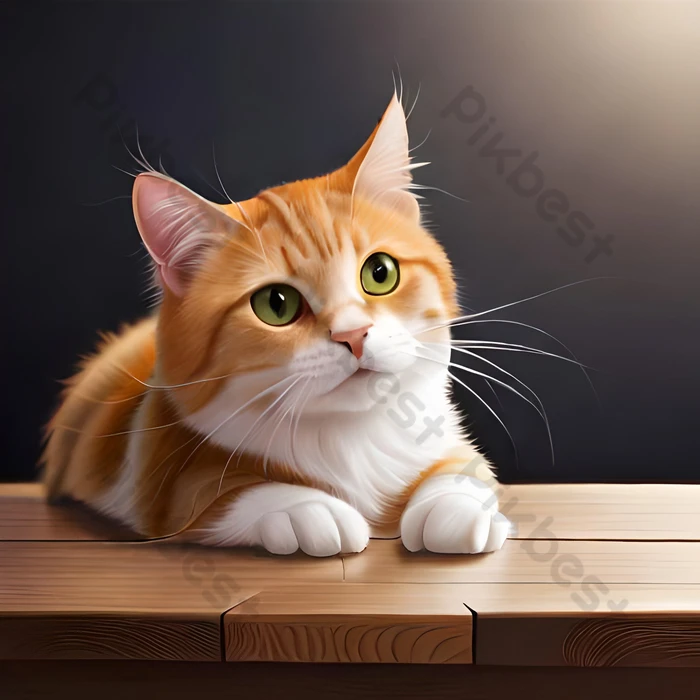

In [15]:
from PIL import Image

img = Image.open('/content/kitten01.jpg!w700wp')
img.show() # tampilkan gambar
display(img) # metode alternatif tampilkan gambar

proses diatas yaitu untuk menampilkan gambar yang telah diupload

Langkah 2 - Ekstrak Fitur

In [16]:
# Ekstrak setiap channel red, green, blue
r, g, b = img.split()

# Cek panjang ukuran channel red
print(len(r.histogram()))

# Cetak fitur histogram pada channel red
print(r.histogram())

256
[6, 0, 15, 45, 15, 80, 47, 47, 145, 204, 576, 153, 533, 606, 1230, 1051, 615, 1031, 305, 886, 1019, 1363, 1410, 2633, 7433, 1747, 6149, 6085, 5655, 5963, 7048, 9863, 1728, 6105, 5455, 4604, 5301, 6963, 7252, 2178, 7218, 5108, 3554, 3753, 4046, 7264, 4659, 6526, 3562, 2970, 4480, 3721, 3768, 1892, 2510, 1311, 2176, 2600, 2266, 2473, 2367, 2659, 1012, 2723, 3734, 2303, 2375, 1897, 2088, 1412, 2148, 1699, 1914, 2390, 2198, 3082, 2144, 2172, 1318, 2232, 2509, 1987, 1431, 2277, 2216, 1989, 2049, 2037, 2112, 2005, 1595, 2023, 2167, 2072, 1925, 2064, 2137, 1877, 1564, 1733, 1626, 1644, 1725, 1717, 1536, 1517, 1138, 1451, 1307, 1447, 1243, 1365, 1468, 1105, 1608, 1769, 1642, 1353, 1702, 1666, 1337, 1530, 1604, 1424, 983, 1568, 1642, 1406, 1339, 1290, 1357, 996, 1399, 1445, 1259, 1374, 1063, 1528, 1490, 1451, 1663, 1460, 1542, 1105, 1411, 1533, 1671, 1664, 1876, 1432, 1275, 1695, 1684, 1497, 1528, 1685, 1477, 1060, 1647, 1482, 1448, 1665, 1639, 1495, 1328, 1450, 1613, 1542, 1739, 1354, 1531

Kode ini mengekstrak dan menganalisis channel warna merah dari gambar RGB:

1. Channel Warna: Gambar RGB (img) dibagi menjadi tiga channel: merah (r), hijau (g), dan biru (b).

2. Histogram Channel Merah: Panjang histogram channel merah dicek dan dicetak, menunjukkan jumlah bin dalam histogram.

3. Distribusi Intensitas: Histogram distribusi intensitas pixel pada channel merah dicetak untuk analisis lebih lanjut.

**Tugas**

Deskripsi Tugas

Pada tugas pratikum ini Anda akan menggunakan data "Wisconsin Breast Cancer". Data tersebut terdiri dari 569 data yang digunakan untuk mendiagnonis jenis kanker Malignant (M) dan Benign (B). Tugas Anda adalah,

1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.

2. Lakukan proses encoding pada kolom "diagnosis".

3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.

4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

# upload data set
from google.colab import files
uploaded = files.upload() # upload file image

Saving wbc.csv to wbc.csv


In [3]:
# Load dataset
file_path = '/content/wbc.csv'
df = pd.read_csv(file_path)

# Lihat beberapa data awal
df.head()

# Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan
# Dalam kasus ini, kolom 'id' biasanya tidak digunakan karena tidak relevan dengan diagnosis
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Lakukan proses encoding pada kolom 'diagnosis'
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Lakukan stratified split data untuk membuat data latih dan data uji dengan rasio 80:20
X = df.drop(columns=['diagnosis'])  # Fitur
y = df['diagnosis']  # Target

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Tampilkan informasi hasil split
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

# Opsional: Melihat distribusi diagnosis pada data latih dan data uji
print("Distribusi diagnosis pada data latih:")
print(y_train.value_counts())

print("Distribusi diagnosis pada data uji:")
print(y_test.value_counts())


Jumlah data latih: 455
Jumlah data uji: 114
Distribusi diagnosis pada data latih:
diagnosis
-0.770609    285
 1.297676    170
Name: count, dtype: int64
Distribusi diagnosis pada data uji:
diagnosis
-0.770609    72
 1.297676    42
Name: count, dtype: int64
